In [4]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import os

In [28]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

In [5]:
# Set up plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [16]:
# Create folder for charts
if not os.path.exists("charts"):
    os.makedirs("charts")

In [29]:
# Load survey data
df = pd.read_excel("JAMB Exam experience survey.xlsx")


In [30]:
# Print column names to check
print("Columns in data: " + str(list(df.columns)))

Columns in data: ['Date', 'Age ', 'Gender  ', 'State', 'Current status', 'Exam Year', 'Exam Score', 'Intended course of study', 'Secondary school attended ', 'Study hours per week', 'Preparation time ', 'Tutorial Centres', 'Past questions usage', 'Mock exam ', 'Access to learning materials ', 'Reliable internet access during preparation', 'Smartphone access', 'Desktop access', 'Laptop access', 'Tablet access', 'No device', 'Technical challenges during exam', 'Performance satisfaction', 'Major reasons for your JAMB performance', 'No issues', 'System issues', 'Portal error', 'Power Outage', 'Network problem']


In [31]:
# Clean data: add pass/fail column (200 or more is pass)
df["result"] = df["Exam Score"].apply(lambda score: "Pass" if score >= 200 else "Fail")

In [32]:
# Fill missing values
df["Major reasons for your JAMB performance"] = df["Major reasons for your JAMB performance"].fillna("Unknown")

In [33]:
# Simplify column names
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

In [34]:
# Print cleaned columns
print("Cleaned columns: " + str(list(df.columns)))

Cleaned columns: ['date', 'age_', 'gender__', 'state', 'current_status', 'exam_year', 'exam_score', 'intended_course_of_study', 'secondary_school_attended_', 'study_hours_per_week', 'preparation_time_', 'tutorial_centres', 'past_questions_usage', 'mock_exam_', 'access_to_learning_materials_', 'reliable_internet_access_during_preparation', 'smartphone_access', 'desktop_access', 'laptop_access', 'tablet_access', 'no_device', 'technical_challenges_during_exam', 'performance_satisfaction', 'major_reasons_for_your_jamb_performance', 'no_issues', 'system_issues', 'portal_error', 'power_outage', 'network_problem', 'result']


In [23]:
# Check for gender column
gender_col = "gender"
if "gender" not in df.columns:
    possible_gender_cols = [col for col in df.columns if "gender" in col.lower()]
    if possible_gender_cols:
        gender_col = possible_gender_cols[0]
        print("Using gender column: " + gender_col)
    else:
        print("No gender column found! Check data.")
        exit()

Using gender column: gender__


In [41]:
# Check for secondary school column
school_col = "secondary_school_attended"
if "secondary_school_attended" not in df.columns:
    possible_school_cols = [col for col in df.columns if "school" in col.lower()]
    if possible_school_cols:
        school_col = possible_school_cols[0]
        print("Using school column: " + school_col)
    else:
        print("No school column found! Check data.")
        exit()

Using school column: secondary_school_attended_


In [44]:
# Check for study hours column
study_col = "study_hours_per_week"
if "study_hours_per_week" not in df.columns:
    possible_study_cols = [col for col in df.columns if "study" in col.lower() or "hours" in col.lower()]
    if possible_study_cols:
        study_col = possible_study_cols[0]
        print("Using study hours column: " + study_col)
    else:
        print("No study hours column found! Check data.")
        exit()

In [45]:
# Check for laptop access column
laptop_col = "laptop_access"
if "laptop_access" not in df.columns:
    possible_laptop_cols = [col for col in df.columns if "laptop" in col.lower()]
    if possible_laptop_cols:
        laptop_col = possible_laptop_cols[0]
        print("Using laptop access column: " + laptop_col)
    else:
        print("No laptop access column found! Check data.")
        exit()

In [46]:
# Check for exam score column
score_col = "exam_score"
if "exam_score" not in df.columns:
    possible_score_cols = [col for col in df.columns if "score" in col.lower()]
    if possible_score_cols:
        score_col = possible_score_cols[0]
        print("Using exam score column: " + score_col)
    else:
        print("No exam score column found! Check data.")
        exit()

In [47]:
# Save cleaned dataset
df.to_excel("cleaned_jamb_data.xlsx", index=False)

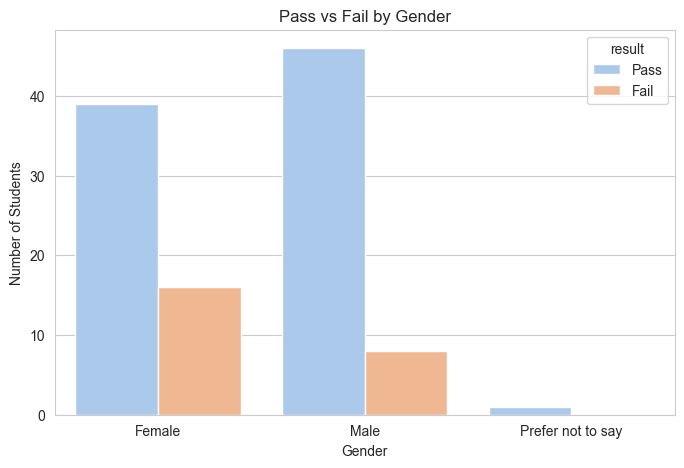

In [48]:
# EDA: Success vs failure rates by gender
sns.countplot(data=df, x=gender_col, hue="result", palette="pastel")
plt.title("Pass vs Fail by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.savefig("charts/pass_fail_by_gender.png")
plt.show()

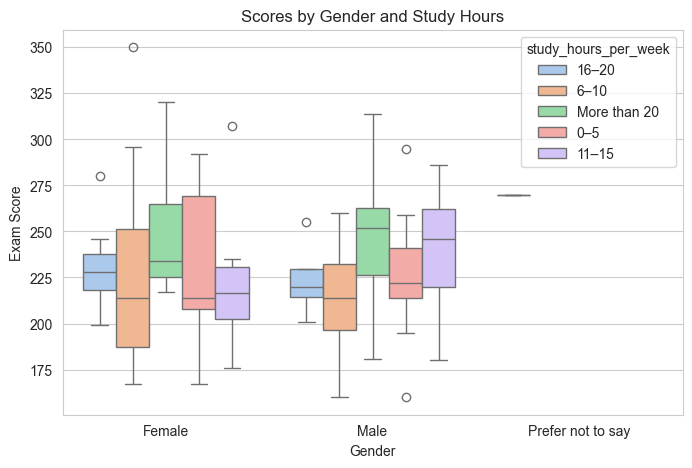

In [50]:
# EDA: Scores by gender vs study hours
sns.boxplot(data=df, x=gender_col, y="exam_score", hue="study_hours_per_week", palette="pastel")
plt.title("Scores by Gender and Study Hours")
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.savefig("charts/scores_by_gender_study.png")
plt.show()

In [53]:
# Prepare data for model
columns = [gender_col, school_col, study_col, laptop_col, score_col]
X = df[columns]
y = df["result"]

In [59]:
# Encode categorical columns
le_gender = LabelEncoder()
X.loc[:, gender_col] = le_gender.fit_transform(X[gender_col])
le_school = LabelEncoder()
X.loc[:, school_col] = le_school.fit_transform(X[school_col])
le_study = LabelEncoder()
X.loc[:, study_col] = le_study.fit_transform(X[study_col])
le_laptop = LabelEncoder()
X.loc[:, laptop_col] = le_laptop.fit_transform(X[laptop_col])

In [60]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


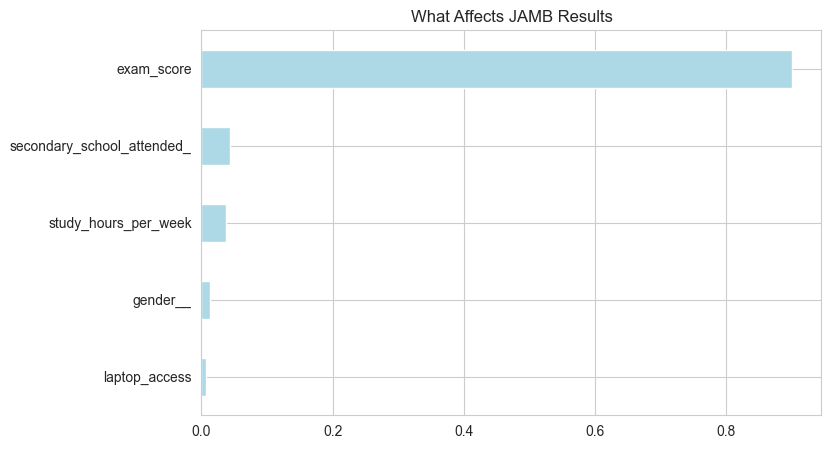

In [62]:
# Plot feature importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values()
importance.plot(kind="barh", color="lightblue")
plt.title("What Affects JAMB Results")
plt.savefig("charts/feature_importance.png")
plt.show()

In [63]:
# Model accuracy
accuracy = model.score(X_test, y_test)
print("Model Accuracy: " + str(round(accuracy * 100, 1)) + "%")

Model Accuracy: 100.0%


In [64]:
# Calculate success/failure rates by gender
total_female = len(df[df[gender_col] == "Female"])
total_male = len(df[df[gender_col] == "Male"])
female_passes = len(df[(df[gender_col] == "Female") & (df["result"] == "Pass")])
female_fails = len(df[(df[gender_col] == "Female") & (df["result"] == "Fail")])
male_passes = len(df[(df[gender_col] == "Male") & (df["result"] == "Pass")])
male_fails = len(df[(df[gender_col] == "Male") & (df["result"] == "Fail")])
female_pass_rate = female_passes / total_female * 100
female_fail_rate = female_fails / total_female * 100
male_pass_rate = male_passes / total_male * 100
male_fail_rate = male_fails / total_male * 100

In [65]:
# Print EDA findings
print("Key Findings:")
print("1. Females: " + str(round(female_pass_rate, 1)) + "% passed (" + str(female_passes) + " students), " + str(round(female_fail_rate, 1)) + "% failed (" + str(female_fails) + " students).")
print("2. Males: " + str(round(male_pass_rate, 1)) + "% passed (" + str(male_passes) + " students), " + str(round(male_fail_rate, 1)) + "% failed (" + str(male_fails) + " students).")
mission_female_pass = len(df[(df[gender_col] == "Female") & (df[school_col] == "Mission/Religious") & (df["result"] == "Pass")]) / len(df[(df[gender_col] == "Female") & (df[school_col] == "Mission/Religious")]) * 100
public_female_pass = len(df[(df[gender_col] == "Female") & (df[school_col] == "Public") & (df["result"] == "Pass")]) / len(df[(df[gender_col] == "Female") & (df[school_col] == "Public")]) * 100
print("3. Female School Type: Mission/Religious pass " + str(round(mission_female_pass, 1)) + "%, Public pass " + str(round(public_female_pass, 1)) + "%.")
mission_male_pass = len(df[(df[gender_col] == "Male") & (df[school_col] == "Mission/Religious") & (df["result"] == "Pass")]) / len(df[(df[gender_col] == "Male") & (df[school_col] == "Mission/Religious")]) * 100
public_male_pass = len(df[(df[gender_col] == "Male") & (df[school_col] == "Public") & (df["result"] == "Pass")]) / len(df[(df[gender_col] == "Male") & (df[school_col] == "Public")]) * 100
print("4. Male School Type: Mission/Religious pass " + str(round(mission_male_pass, 1)) + "%, Public pass " + str(round(public_male_pass, 1)) + "%.")
print("5. Study Hours: Females and males with more study hours score higher.")

Key Findings:
1. Females: 70.9% passed (39 students), 29.1% failed (16 students).
2. Males: 85.2% passed (46 students), 14.8% failed (8 students).
3. Female School Type: Mission/Religious pass 66.7%, Public pass 75.0%.
4. Male School Type: Mission/Religious pass 89.5%, Public pass 60.0%.
5. Study Hours: Females and males with more study hours score higher.


In [66]:
# Forecast success/failure rates by gender for 2026–2030
years = [2026, 2027, 2028, 2029, 2030]
female_forecast_pass = [female_pass_rate - i for i in range(1, 6)]
female_forecast_fail = [100 - rate for rate in female_forecast_pass]
male_forecast_pass = [male_pass_rate - i for i in range(1, 6)]
male_forecast_fail = [100 - rate for rate in male_forecast_pass]

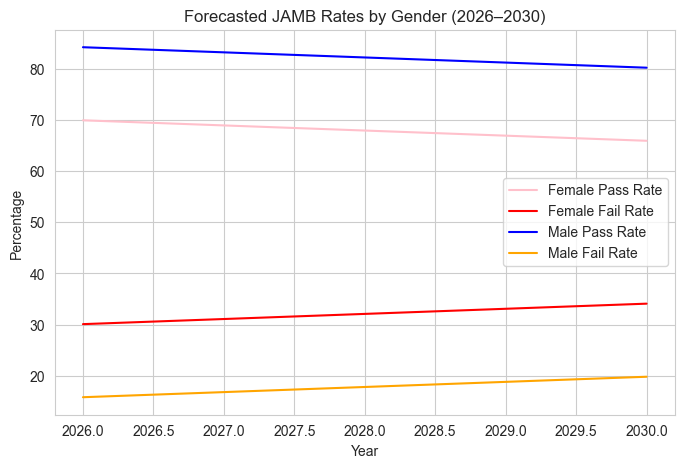

In [67]:
# Plot forecast
plt.plot(years, female_forecast_pass, label="Female Pass Rate", color="pink")
plt.plot(years, female_forecast_fail, label="Female Fail Rate", color="red")
plt.plot(years, male_forecast_pass, label="Male Pass Rate", color="blue")
plt.plot(years, male_forecast_fail, label="Male Fail Rate", color="orange")
plt.title("Forecasted JAMB Rates by Gender (2026–2030)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.savefig("charts/forecast_gender_rates.png")
plt.show()

In [68]:
# Print forecast
print("Forecast for 2026–2030:")
for i in range(5):
    print("Year " + str(years[i]) + ": Female Pass " + str(round(female_forecast_pass[i], 1)) + "%, Female Fail " + str(round(female_forecast_fail[i], 1)) + "%, Male Pass " + str(round(male_forecast_pass[i], 1)) + "%, Male Fail " + str(round(male_forecast_fail[i], 1)) + "%.")

Forecast for 2026–2030:
Year 2026: Female Pass 69.9%, Female Fail 30.1%, Male Pass 84.2%, Male Fail 15.8%.
Year 2027: Female Pass 68.9%, Female Fail 31.1%, Male Pass 83.2%, Male Fail 16.8%.
Year 2028: Female Pass 67.9%, Female Fail 32.1%, Male Pass 82.2%, Male Fail 17.8%.
Year 2029: Female Pass 66.9%, Female Fail 33.1%, Male Pass 81.2%, Male Fail 18.8%.
Year 2030: Female Pass 65.9%, Female Fail 34.1%, Male Pass 80.2%, Male Fail 19.8%.


In [69]:
# Print recommendations
print("Recommendations:")
print("1. Female Students: Study 20+ hours weekly with past questions.")
print("2. Male Students: Join study groups to improve focus.")
print("3. Schools: Offer JAMB prep for both genders, focus on public schools.")
print("4. Policymakers: Provide study resources for females in rural areas.")

Recommendations:
1. Female Students: Study 20+ hours weekly with past questions.
2. Male Students: Join study groups to improve focus.
3. Schools: Offer JAMB prep for both genders, focus on public schools.
4. Policymakers: Provide study resources for females in rural areas.
